# `Homework 2: Regression`


### Dataset

In this homework, we will use the Laptops price from [Kaggle](https://www.kaggle.com/datasets/juanmerinobermejo/laptops-price-dataset).

Here's a wget-able [link](wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv):


The goal of this homework is to create a regression model for predicting the prices (column `'Final Price'`).

### Preparing the dataset
First, we'll normalize the names of the columns:
> df.columns = df.columns.str.lower().str.replace(' ', '_')

In [245]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Getting the data
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv

### Preparing the dataset

First, we'll normalize the names of the columns:

`df.columns = df.columns.str.lower().str.replace(' ', '_')`

Now, instead of `'Final Price'`, we have `'final_price'`.

Next, use only the following columns:

* `'ram'`,
* `'storage'`,
* `'screen'`,
* `'final_price'`,


### EDA
* Look at the `final_price` variable. Does it have a long tail?

### Question 1

There's one column with missing values. What is it?

* `ram`
* `storage`
* `screen`
* `final_price`

In [246]:
# Load the dataset
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv'
df = pd.read_csv(url)
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [247]:
# Normalize the column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [248]:
# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

Missing values in each column:
 laptop             0
status             0
brand              0
model              0
cpu                0
ram                0
storage            0
storage_type      42
gpu             1371
screen             4
touch              0
final_price        0
dtype: int64


In [249]:
print(df.dtypes)

laptop           object
status           object
brand            object
model            object
cpu              object
ram               int64
storage           int64
storage_type     object
gpu              object
screen          float64
touch            object
final_price     float64
dtype: object


In [250]:
missing_values = df.isnull().sum()
missing_column = missing_values[missing_values > 0]
print(missing_column)

storage_type      42
gpu             1371
screen             4
dtype: int64


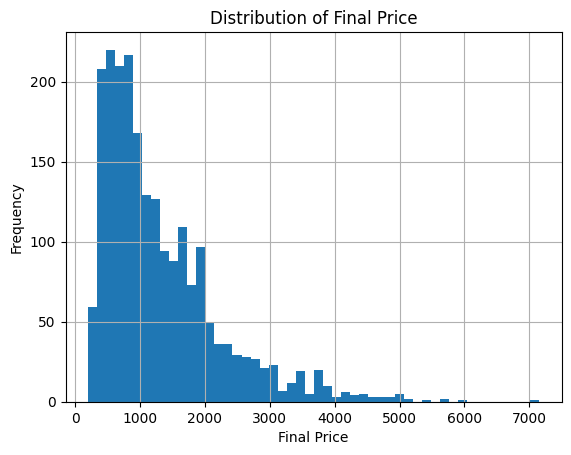

In [251]:
import matplotlib.pyplot as plt

# Plot the distribution of the final_price column
df['final_price'].hist(bins=50)
plt.xlabel('Final Price')
plt.ylabel('Frequency')
plt.title('Distribution of Final Price')
plt.show()

### Question 2

What's the median (50% percentile) for variable `'ram'`?

- 8
- 16
- 24
- 32

In [252]:
# Calculate the median of the 'ram'
ram_median = df['ram'].median()
print(f"Median RAM: {ram_median}")

Median RAM: 16.0


### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.


In [253]:
from sklearn.model_selection import train_test_split

In [254]:
# Shuffle and split the dataset
train_val, test = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)
train, val = train_test_split(train_val, test_size=0.25, random_state=42, shuffle=True)

In [255]:
print(f'Train size: {train.shape}, Validation size: {val.shape}, Test size: {test.shape}')

Train size: (1296, 12), Validation size: (432, 12), Test size: (432, 12)


In [256]:
# sizes of the datasets
print(f"Training set size: {len(df_train)}")
print(f"Validation set size: {len(df_val)}")
print(f"Test set size: {len(df_test)}")

Training set size: 1296
Validation set size: 432
Test set size: 432


### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good

In [257]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [258]:
# Fill with 0
train_zero = train.fillna(0)
val_zero = val.fillna(0)

In [259]:
# Convert categorical variables to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

In [260]:
# Define the target variable and features
X = df_encoded.drop('final_price', axis=1)
y = df_encoded['final_price']

In [261]:
# Split the dataset into train, validation, and test sets
train_val, test = train_test_split(df_encoded, test_size=0.2, random_state=42, shuffle=True)
train, val = train_test_split(train_val, test_size=0.25, random_state=42, shuffle=True)  # 0.25 of 0.8 = 0.2


In [262]:
# Fill with 0 for any remaining missing values
train_zero = train.fillna(0)
val_zero = val.fillna(0)

In [263]:
# Train model with filled values
X_train_zero = train_zero.drop('final_price', axis=1)
y_train_zero = train_zero['final_price']
X_val_zero = val_zero.drop('final_price', axis=1)
y_val_zero = val_zero['final_price']

model_zero = LinearRegression()
model_zero.fit(X_train_zero, y_train_zero)

LinearRegression()

In [264]:
# Predict and calculate RMSE
y_pred_zero = model_zero.predict(X_val_zero)
rmse_zero = np.sqrt(mean_squared_error(y_val_zero, y_pred_zero))

In [265]:
# Use mean for 'ram' as previously done
train_mean = train.fillna(mean_ram)
val_mean = val.fillna(mean_ram)

In [266]:
# Train model for mean filled values
X_train_mean = train_mean.drop('final_price', axis=1)
y_train_mean = train_mean['final_price']
X_val_mean = val_mean.drop('final_price', axis=1)
y_val_mean = val_mean['final_price']

model_mean = LinearRegression()
model_mean.fit(X_train_mean, y_train_mean)

LinearRegression()

In [267]:
# Predict and calculate RMSE
y_pred_mean = model_mean.predict(X_val_mean)
rmse_mean = np.sqrt(mean_squared_error(y_val_mean, y_pred_mean))

In [268]:
print(f'RMSE with 0: {round(rmse_zero, 2)}')
print(f'RMSE with mean: {round(rmse_mean, 2)}')

RMSE with 0: 364.29
RMSE with mean: 362.94


### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0.
* Try different values of `r` from this list: `[0, 0.01, 0.1, 1,  5, 10]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:

- 0
- 0.01
- 1
- 10
- 100

In [269]:
from sklearn.linear_model import Ridge

In [270]:
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]
best_rmse = float('inf')
best_r = None

In [271]:
for r in r_values:
    model_ridge = Ridge(alpha=r)
    model_ridge.fit(X_train_zero, y_train_zero)
    y_pred_ridge = model_ridge.predict(X_val_zero)
    rmse_ridge = np.sqrt(mean_squared_error(y_val_zero, y_pred_ridge))
    
    print(f'RMSE for r={r}: {round(rmse_ridge, 2)}')
    
    if rmse_ridge < best_rmse:
        best_rmse = rmse_ridge
        best_r = r

print(f'Best r: {best_r} with RMSE: {round(best_rmse, 2)}')

RMSE for r=0: 364.29
RMSE for r=0.01: 362.96
RMSE for r=0.1: 360.26
RMSE for r=1: 367.89
RMSE for r=5: 393.72
RMSE for r=10: 412.64
RMSE for r=100: 495.5
Best r: 0.1 with RMSE: 360.26


### Question 5

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 0.5
- 0.05
- 0.005
- 0.0005


 Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different.
> If standard deviation of scores is low, then our model is *stable*.

In [272]:
# Handle categorical variables
df = pd.get_dummies(df, drop_first=True)

In [273]:
# Fill missing values with 0
df = df.fillna(0)

In [274]:
# Now, split and evaluate the model
seed_values = range(10)
rmse_scores = []

In [275]:
for seed in seed_values:
    train_val, test = train_test_split(df, test_size=0.2, random_state=seed, shuffle=True)
    train, val = train_test_split(train_val, test_size=0.25, random_state=seed, shuffle=True)
    
    X_train = train.drop('final_price', axis=1)
    y_train = train['final_price']
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    X_val = val.drop('final_price', axis=1)
    y_val = val['final_price']
    
    y_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    rmse_scores.append(rmse)

std_rmse = np.std(rmse_scores)
print(f'Standard Deviation of RMSE: {round(std_rmse, 3)}')

Standard Deviation of RMSE: 31.595


### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`.
* What's the RMSE on the test dataset?

Options:

- 0.13
- 0.23
- 0.33
- 0.43

In [276]:
# Using seed 9
train_val, test = train_test_split(df, test_size=0.2, random_state=9, shuffle=True)
train_val_zero = train_val.fillna(0)

In [277]:
X_train_val = train_val_zero.drop('final_price', axis=1)
y_train_val = train_val_zero['final_price']

In [278]:
model_final = Ridge(alpha=0.001)
model_final.fit(X_train_val, y_train_val)

Ridge(alpha=0.001)

In [279]:
X_test = test.fillna(0).drop('final_price', axis=1)
y_test = test.fillna(0)['final_price']

In [280]:
y_pred_test = model_final.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f'Test RMSE: {round(rmse_test, 2)}')

Test RMSE: 324.28
